# Practice Session 04: Weighted Networks


In this session we will reconstruct the World Trade Web using [NetworkX](https://networkx.github.io/), a Python package. This practice is inspired by a paper analysing the Topology of the World Trade Web (https://arxiv.org/abs/cond-mat/0301015).

You will alo be plotting networks and data using [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html).

The dataset we will use comes from OECD's [quarterly international trade statistics](https://stats.oecd.org/Index.aspx?DataSetCode=QITS#) dataset, and these are your input files:

* ``trade-2012-flows.csv`` international trade in 2012
* ``trade-countries.csv`` list of countries and territories

**Important:** Remember to check you are using version 3.5 of networkx.

# 1. Read mapping of codes to country names

Read into variable ``id2name`` the file containing the list of countries and territories.

This is a tab-separated file with two columns: *code*, which is a letter code (e.g. ``PRT``),  and *name* (e.g., ``Portugal``).

You can use the following code snippet to read a compressed file:

```python
# Open a file for reading in text mode
with open(FILENAME, "rt") as input_file:

    # Create a CSV reader for a tab-delimited file with a header
    reader = csv.DictReader(input_file, delimiter='\t')
    
    # Iterate through records, each record is a dictionary
    for record in reader:
        print(record)
```

In [115]:
import csv
import io
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd

In [116]:
# Ensure the paths to the files are correct

INPUT_NAMES_FILENAME = "data/trade-flows/trade-countries.csv"
INPUT_TRADE = "data/trade-flows/trade-2012-flows.csv"
YEAR = 2012

In [117]:
id2name = {}

In [118]:
# Open a file for reading in text mode
with open(INPUT_NAMES_FILENAME, "rt") as input_file:

    # Create a CSV reader for a tab-delimited file with a header
    reader = csv.DictReader(input_file, delimiter='\t')
    
    # Iterate through records, each record is a dictionary
    for record in reader:
        #print(record)
        country_code = record['code']
        country_name = record['name']
        id2name[country_code] = country_name
print(id2name)

{'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'CAN': 'Canada', 'CHE': 'Switzerland', 'CHL': 'Chile', 'CZE': 'Czech Republic', 'DEU': 'Germany', 'DNK': 'Denmark', 'ESP': 'Spain', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 'GBR': 'United Kingdom', 'GRC': 'Greece', 'HUN': 'Hungary', 'IRL': 'Ireland', 'ISL': 'Iceland', 'ISR': 'Israel', 'ITA': 'Italy', 'JPN': 'Japan', 'LUX': 'Luxembourg', 'MEX': 'Mexico', 'NLD': 'Netherlands', 'NOR': 'Norway', 'NZL': 'New Zealand', 'POL': 'Poland', 'PRT': 'Portugal', 'SVK': 'Slovak Republic', 'SVN': 'Slovenia', 'SWE': 'Sweden', 'TUR': 'TÃ¼rkiye', 'USA': 'United States'}


Test the mapping using the following code.

In [119]:
# LEAVE AS-IS, it should print "Finland"

print(id2name["FIN"])

Finland


# 2. Read flows data

## 2.1. Create a weighted directed graph

The file `INPUT_TRADE` contains three columns:

* from (country from which the goods or services are exported)
* to (country that receives the goods or services)
* amount (total amount in USD)

Take into account that exports from one country to a second one are the imports of the second one from the first.

Create a NetworkX directed weighted graphs as `g_trade` with 'amount' as the weight of the edges and the nodes named with the country codes.

You can create an empty graph using:

```python
g = nx.DiGraph()
```

By default the columns read by a DictReader are string, but you can convert the column containing the amount exported to a floating point number by using `float()`. Divide the `amount` by one million and round to the nearest integer (you can use the function `round()`), so the weights will be expressed in millions of dollars. Make sure to include only positive values.

**Important:** create only the nodes corresponding to countries listed in ``INPUT_NAMES_FILENAME`` (keys in ``id2name``)

<font size="+1" color="red">Replace this cell with your code to create the graph g_trade.</font>

In [120]:
id2name_sent = {}

In [121]:
# Open a file for reading in text mode
with open(INPUT_TRADE, "rt") as input_file:

    # Create a CSV reader for a tab-delimited file with a header
    reader = csv.DictReader(input_file, delimiter='\t')
    
    # Iterate through records, each record is a dictionary
    for record in reader:
        #print(record)
        country_from = record['from']
        country_to = record['to']
        trade_amount_sent = int(record['amount'])

        id2name_sent[(country_from, country_to)] = trade_amount_sent

In [122]:
print(id2name_sent['AUS', 'CHN'])  # Example

# USe this to find trade deficits/surpluses

73943562502


In [123]:
# Create a directed weighted graph for trade flows
g_trade = nx.DiGraph()

for exporter in id2name:
    for importer in id2name:
        if exporter != importer:
            # Check if trade data exists for this pair
            if (exporter, importer) in id2name_sent:
                amount = id2name_sent[(exporter, importer)]
                # Only include positive values, convert to millions and round
                weight = round(amount / 1_000_000)
                if weight > 0:
                    g_trade.add_edge(exporter, importer, weight=weight)

In [124]:
# LEAVE AS IS

print("The {:d} graph contains {:d} nodes and {:d} edges with a total weight of {:,d} million USD".format(YEAR, g_trade.number_of_nodes(),g_trade.size(),sum(d.get("weight", 0) for u, v, d in g_trade.edges(data=True))))

The 2012 graph contains 33 nodes and 1049 edges with a total weight of 6,616,535 million USD


This code should have printed:

```
The 2012 graph contains 33 nodes and 1049 edges with a total weight of 6,616,535 million USD
```

If it prints more than that, perhaps you read some edges having one of the two nodes outside of the list of countries.

In [125]:
print(id2name)

{'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'CAN': 'Canada', 'CHE': 'Switzerland', 'CHL': 'Chile', 'CZE': 'Czech Republic', 'DEU': 'Germany', 'DNK': 'Denmark', 'ESP': 'Spain', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 'GBR': 'United Kingdom', 'GRC': 'Greece', 'HUN': 'Hungary', 'IRL': 'Ireland', 'ISL': 'Iceland', 'ISR': 'Israel', 'ITA': 'Italy', 'JPN': 'Japan', 'LUX': 'Luxembourg', 'MEX': 'Mexico', 'NLD': 'Netherlands', 'NOR': 'Norway', 'NZL': 'New Zealand', 'POL': 'Poland', 'PRT': 'Portugal', 'SVK': 'Slovak Republic', 'SVN': 'Slovenia', 'SWE': 'Sweden', 'TUR': 'TÃ¼rkiye', 'USA': 'United States'}


In [126]:
# LEAVE AS-IS

for exporter in ["GBR","AUS", "USA",]:
    for importer in ["GBR","AUS", "USA",]:
      if importer!= exporter:
          print("In {:d}, {:s} ({:s}) exported to {:s} ({:s}) goods and services worth {:,d} million USD".format(
              YEAR, exporter, id2name[exporter], importer, id2name[importer],
                g_trade.get_edge_data(exporter, importer)["weight"]) )

          print("")


In 2012, GBR (United Kingdom) exported to AUS (Australia) goods and services worth 7,022 million USD

In 2012, GBR (United Kingdom) exported to USA (United States) goods and services worth 64,245 million USD

In 2012, AUS (Australia) exported to GBR (United Kingdom) goods and services worth 6,621 million USD

In 2012, AUS (Australia) exported to USA (United States) goods and services worth 7,916 million USD

In 2012, USA (United States) exported to GBR (United Kingdom) goods and services worth 54,810 million USD

In 2012, USA (United States) exported to AUS (Australia) goods and services worth 31,192 million USD



It should have printed:

```
In 2012, GBR (United Kingdom) exported to AUS (Australia) goods and services worth 7,022 million USD

In 2012, GBR (United Kingdom) exported to USA (United States) goods and services worth 64,245 million USD

In 2012, AUS (Australia) exported to GBR (United Kingdom) goods and services worth 6,621 million USD

In 2012, AUS (Australia) exported to USA (United States) goods and services worth 7,916 million USD

In 2012, USA (United States) exported to GBR (United Kingdom) goods and services worth 54,810 million USD

In 2012, USA (United States) exported to AUS (Australia) goods and services worth 31,192 million USD

```

## 2.2. Compute totals

Next, compute the total exports of each country, into a dictionary: `exports`, with keys being country codes, and values being total exports. Do the same with total imports, into the variable `imports`.

To iterate through the nodes of a graph, you can use:

```python
for n in g.nodes():
    # n is the name of the node
```

To create a dictionary `dic` initialized so that all keys are the elements of set `s` and all values are zero:

```python
dic = dict([(element,0) for element in s])
```

To avoid code duplication, create a function `sum_weights(graph, direction, weight_key)`. This function should receive a *graph*, a *direction* ("in" or "out"), and a *weight_key*, defaulting to "weight".



In [127]:
exports = dict([(element, 0) for element in g_trade.nodes()])
imports = dict([(element, 0) for element in g_trade.nodes()])

In [128]:
print(exports['AUS'])
print(imports['AUS'])

0
0


In [129]:
exports = dict([(element, 0) for element in g_trade.nodes()])
imports = dict([(element, 0) for element in g_trade.nodes()])

def sum_weights(graph, direction, weight_key = 'weight'):
    for ex in graph.nodes():
        for im in graph.nodes():
            if ex == im:
                continue # Skip self trade
            if graph.get_edge_data(ex, im) is None:
                continue
            trade = graph.get_edge_data(ex, im)[weight_key]

            if direction == 'out':
                exports[ex] += trade
            if direction == 'in':
                imports[im] += trade


In [130]:
sum_weights(g_trade, 'in')
sum_weights(g_trade, 'out')

<font size="+1" color="red">Replace this cell with your code to compute totals into dictionaries exports and imports. Create a function *sum_weights* to avoid code duplication.</font>

In [131]:
# LEAVE AS-IS

for country in ['GBR', 'AUS', 'USA']:
    print("In {:d} {:s} exported goods and services worth {:,d} Million USD ,and imported goods and services worth {:,d} Million USD \n for a total trade balance of {:,d} Million USD.".format(
    YEAR, id2name[country], exports[country], imports[country], exports[country]-imports[country]
    ))
    print()

In 2012 United Kingdom exported goods and services worth 325,378 Million USD ,and imported goods and services worth 499,703 Million USD 
 for a total trade balance of -174,325 Million USD.

In 2012 Australia exported goods and services worth 71,773 Million USD ,and imported goods and services worth 108,802 Million USD 
 for a total trade balance of -37,029 Million USD.

In 2012 United States exported goods and services worth 951,452 Million USD ,and imported goods and services worth 1,205,552 Million USD 
 for a total trade balance of -254,100 Million USD.



It should print:

```
In 2012 United Kingdom exported goods and services worth 325,378 Million USD ,and imported goods and services worth 499,703 Million USD
 for a total trade balance of -174,325 Million USD.

In 2012 Australia exported goods and services worth 71,773 Million USD ,and imported goods and services worth 108,802 Million USD
 for a total trade balance of -37,029 Million USD.

In 2012 United States exported goods and services worth 951,452 Million USD ,and imported goods and services worth 1,205,552 Million USD
 for a total trade balance of -254,100 Million USD.
```

# 3. Draw the trade graph

Draw a directed graph using NetworkX with the following characteristics.

* Node size proportional to total imports.
* Directed links in the direction of net trade. Colour proportional to net trade. To avoid clutter represent only the links with a weight > 5000
* Use a spring model layout.
* Make sure arrow heads are visible.

You can use the following Networkx functions:

* `nx.spring_layout(g, iterations=100, weight=, k=)`
* `positions = nx.draw_networkx_nodes(g, positions, node_color=,node_size=)`
* `nx.draw_networkx_edges(g, positions, edgelist=, width=, edge_color=, arrows=True, min_source_margin=0, min_target_margin=)`
* `nx.draw_networkx_labels(g, positions, font_color=)`

You can define the scale and create a colormap using the following functions
* `norm = LogNorm(vmin=min_val, vmax=max_val)`
* `cmap = cm.plasma`

Tune the parameter k and the size of the nodes to avoid overlap. Higher values of k will result

Tip: a good value for the min_target_margin attribute in nx.draw_networkx_edges is $\sqrt(node\_size/\pi)$ where node_size is the same value as in the nx.draw_networkx_nodes() attribute

Tip: remember to import cm from matplotlib and LogNorm from matplotlib.colors

Tip: Be careful with the size of the node, if it is too big the graph will not be readable try small multipliers if this happens.


<font size="+1" color="red">Replace this cell with your code to plot the graph.</font>

In [132]:
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

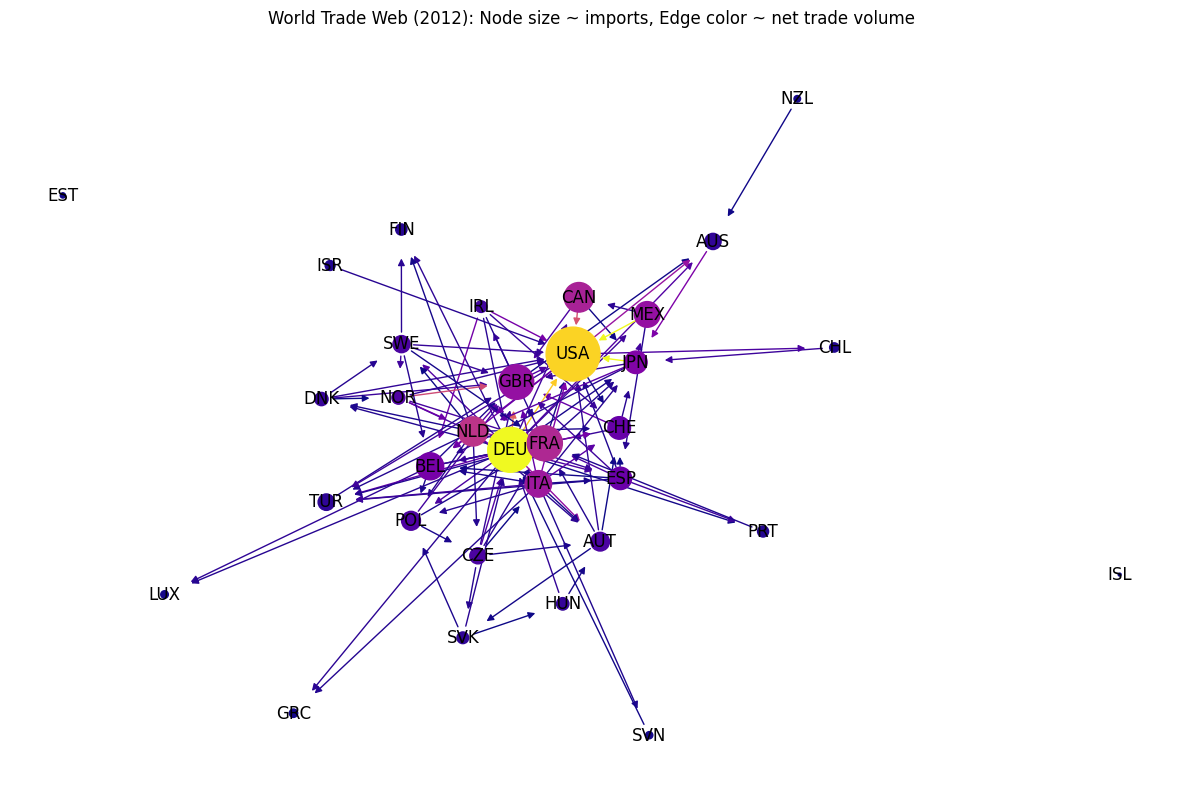

In [133]:

# Compute positions using spring layout
positions = nx.spring_layout(g_trade, iterations=1000, k=0.999, seed=40)

# Node sizes proportional to imports
node_sizes = [imports[n]/80 for n in g_trade.nodes()]
node_colors = [exports[n]*10 for n in g_trade.nodes()] # Discrete colour mapping

# Only show edges with weight > 5000 and net trade is positive
edgelist = []
edge_colors = []
for u, v, d in g_trade.edges(data=True):
	if d['weight'] > 5000:
		expo = g_trade.get_edge_data(u, v)["weight"]
		impo = g_trade.get_edge_data(v, u)["weight"]
		net_trade = expo - impo # NET TRADE!!!
		if net_trade > 0:
			edgelist.append((u, v))
			edge_colors.append(net_trade)

# Define color normalisation and colormap
min_val = min(edge_colors) if edge_colors else 1
max_val = max(edge_colors) if edge_colors else 1
norm = LogNorm(vmin=min_val, vmax=max_val)
cmap = cm.plasma


node_size=[s/10 for s in node_sizes]
plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(g_trade, positions, node_color=node_colors, node_size=node_size, cmap=cmap)
nx.draw_networkx_edges(
	g_trade, positions, edgelist=edgelist, width=1,
	edge_color=edge_colors, edge_cmap=cmap, arrows=True,
	min_source_margin=0, min_target_margin=math.sqrt(node_sizes[0]/math.pi)
)


nx.draw_networkx_labels(g_trade, positions, font_color='black')

plt.title("World Trade Web (2012): Node size ~ imports, Edge color ~ net trade volume")
plt.axis('off')
plt.show()


<font size="+1" color="red">Replace this cell with a brief commentary on the different features of these plots such as major trading countries by export volume, and some of the biggest net trade values.</font>

The USA and Germany are the biggest importers whilst also being some of the biggest importers, in total, they have the largest total trade volume, followed by Britain, France, Netherlands, Canada, etc.
Some other notable features are Estonia and ISL that have no net trade data above 5 Billion with any other country.
We also see a few smaller nations with relatively lower trade volumes on the outside of the largest connected cluster, like Slovakia, Luxembourg, Greece

# 4. Comparison of export and import scores

Now, we will compare the imports and exports of different countries.

We can do this visually by plotting both in log-log scale. You can use the following code snippet, which assumes we are plotting dictionary *a* against dictionary *b*. **Do not forget to filter out cases where values of *a* or *b* are 0**:

```python
# Create log-log plot
plt.figure(figsize=(20,10))
plt.loglog()
plt.xlabel("x axis label", {'size': '22'})
plt.ylabel("y axis label", {'size': '22'})

# Add a diagonal line
plt.plot([min(a.values()),max(a.values())], [min(b.values()),max(b.values())], '-.', lw=2)

# Do the scatter plot with texts
for country in set(a.keys()).intersection(set(b.keys())):
    plt.text(a[country], b[country], country, {'size': '12'})
```

Plot the imports on the x axis and the imports in the y axis.

Remember to add labels to the x axis and y axis before delivering your plots, and to use a function (name it `plot_scatter`) to draw your plots: do not duplicate code.


<font size="+1" color="red">Replace this cell with your function *plot_scatter*. **Before do not forget to filter out cases where values of *a* or *b* are 0**</font>

In [134]:
def plot_scatter(a, b, xlabel, ylabel):
    # Filter out cases where values of a or b are 0
    filtered_keys = [k for k in a if a[k] > 0 and b.get(k, 0) > 0] # Filter here to avoid log(0) and saves sscatter at the end
    x = [a[k] for k in filtered_keys]
    y = [b[k] for k in filtered_keys]

    plt.figure(figsize=(20, 10)) # Set figure size!!!
    plt.loglog()
    plt.xlabel(xlabel, {'size': '22'})
    plt.ylabel(ylabel, {'size': '22'})

    # Add a diagonal line
    min_x, max_x = min(x), max(x)
    min_y, max_y = min(y), max(y)
    plt.plot([min_x, max_x], [min_y, max_y], '-.', lw=2) # Diagonal line -Clearer like this

    # Scatter plot with country codes
    for k in filtered_keys:
        plt.text(a[k], b[k], k, {'size': '12'})

    plt.show()

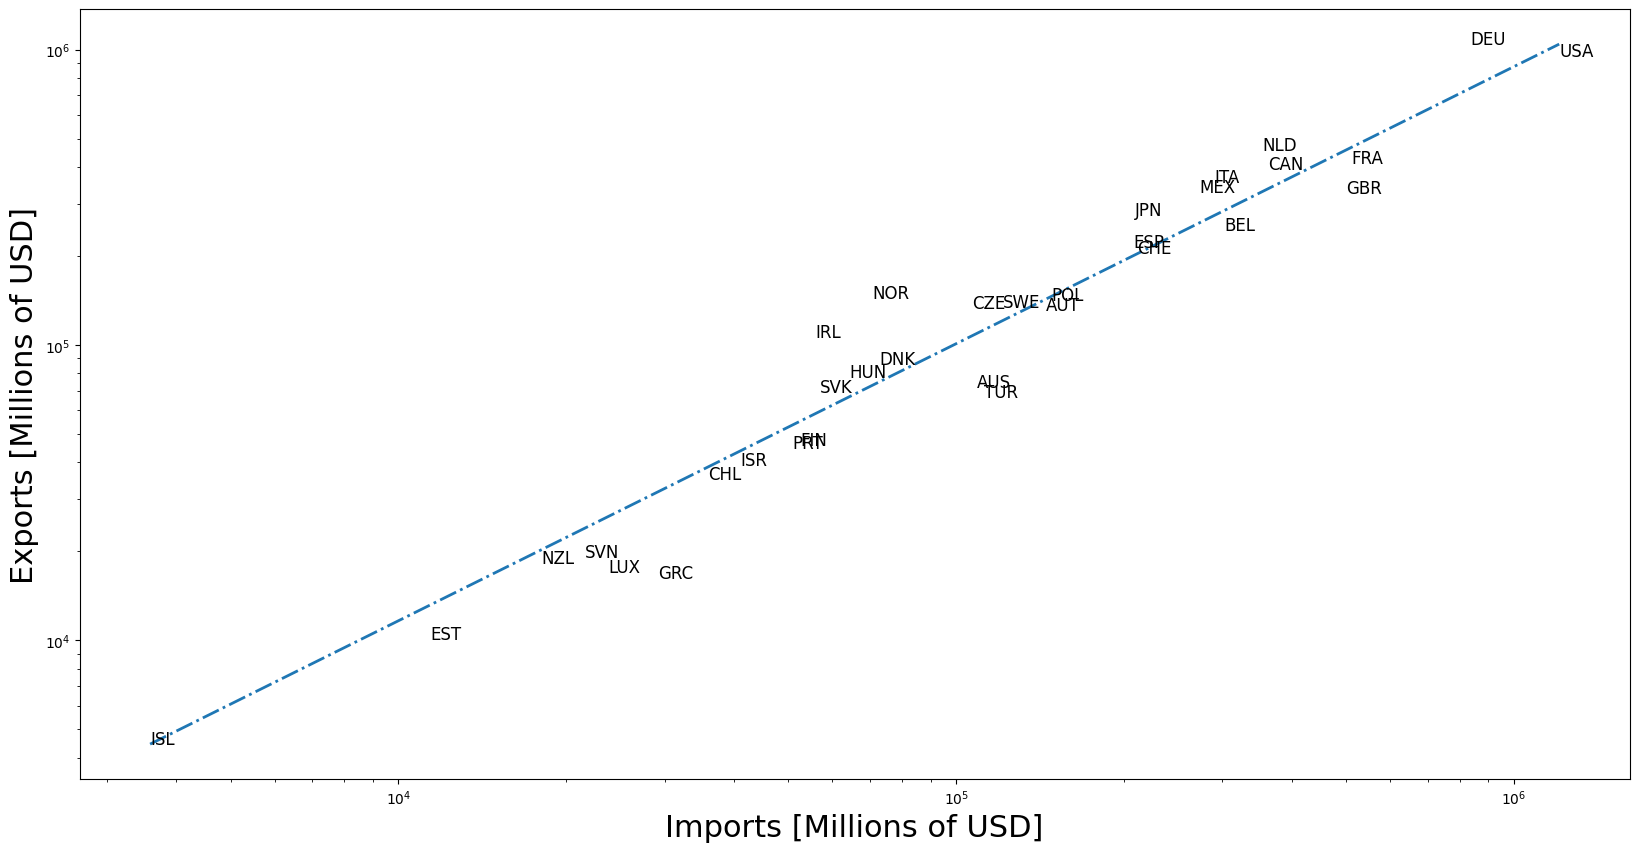

In [135]:
# LEAVE AS-IS: print plots for the newer dataset

plot_scatter(imports, exports, "Imports [Millions of USD]", "Exports [Millions of USD]" )

<font size="+1" color="red">Replace this cell with a brief commentary about the plots above with respect to the trade balance (the difference between exports and imports) of various countries.</font>

This plot generally shows that countries keep close to net 0 trade balances overall; they deviate from the neutral line by at most, about a factor of 2. Generally, high import countries are also producing and exporting similar amount, and vice versa for low import countries.
The most notable export surplus country is Norway, exporting around twice as much as it imports, presumably since they sell a lot of oil.
The most notable import country is Greece, importing around twice as much as it exports.

The top 2 economies represented here are Germany and the USA; Germany is in a slight exporting surplus whilst the USA is in a very slight import surplus.

# DELIVER (individually)

A .zip file containing:

* This notebook.


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>